In [1]:
#ARBOL DE DECISION____________________________________
# Librerías para manejo de datos
 # librería Natural Language Toolkit, usada para trabajar con textos 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree


In [2]:
#CARGA DE DATOS YA PREPROCESADOS
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('SuicidiosPurificado.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data.dropna()
display(data_t.sample(10))

,Unnamed: 0.1,Unnamed: 0,text,class,words
114306,114339,130468,I am getting to the point of killing myself.He...,suicide,get point kil myselfhey everyon nam start feel...
102931,102962,74050,Why cannot everyone stop talking about the nea...,suicide,everyon stop talk near fut try kil myselfnev u...
194647,194708,344258,I just heard someone be transphobic on the rad...,non-suicide,heard someon transphob radio tot angry fuck no...
140241,140287,188653,"At the end of my history class everytime, I tu...",non-suicide,end hist class everytim turn snap potato filt ...
123922,123960,184059,MedicationsWhat medications is anyone else tak...,suicide,medicationswh med anyon els tak cury also sid ...
48650,48660,186023,Dudes be paying for seeing Pussy pics. When th...,non-suicide,dud pay see pussy pic us mir post brought hoe ...
116684,116718,137973,Waking upDoes anyone wake up in the morning an...,suicide,wak updo anyon wak morn disappoint wake updoes...
1172,1172,108811,"everything i have ever wanted, since before i ...",suicide,everyth ev want sint remember know ev going di...
124206,124244,300482,you know that person who no one ever counts on...,non-suicide,know person on ev count anyth everyon know goi...
28698,28704,54642,Story time Like last year I met this really cu...,non-suicide,story tim lik last year met real cut girl lik ...


In [3]:
#Separar datos
X_data, y_data = data_t['words'],data_t['class']
y_data = (y_data == 'suicide').astype(int)
y_data

0         1
1         0
2         1
3         1
4         1
         ..
195634    0
195635    0
195636    0
195637    0
195638    1
Name: class, Length: 195639, dtype: int32

In [4]:
#Se realiza la vectorización por conteo de palabras
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)

(195639, 204752)


C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


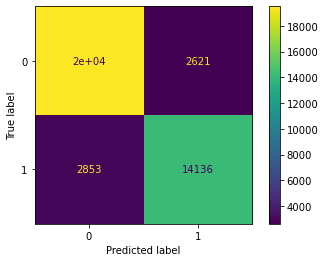

In [5]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_count, y_data, test_size=0.2, random_state=0)
#Se crea el arbol
arbol = DecisionTreeClassifier(criterion='gini', random_state=0)
arbol = arbol.fit(X_train,Y_train)
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

In [6]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.86
Recall: 0.8320678085820237
Precisión: 0.8435877543713075
Puntuación F1: 0.8377881823030878


In [7]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     22139
           1       0.84      0.83      0.84     16989

    accuracy                           0.86     39128
   macro avg       0.86      0.86      0.86     39128
weighted avg       0.86      0.86      0.86     39128

